In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
smile = pd.read_csv('../data/smile_clean.csv').drop('Unnamed: 0', axis = 1)
smile.head(3)

,callreportnum,reportversion,callstart,callend,callernum,city,num of upper natural teeth,num of lower natural teeth,removable dentures,denture(s) when you eat,how often do you brush your teeth,need for periodontal care,root fragments,suspicious soft tissue lesions,treatment urgency,untreated decay
0,93115324,SMILE ON 60+ Registration,9/30/2021 16:56,9/30/2021 16:57,3638169,Smyrna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,4431194,Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93115081,SMILE ON 60+ Clinical,9/30/2021 16:50,9/30/2021 16:51,2941341,Memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### nashville patients only

In [4]:
nash = pd.read_csv('../data/nash_visitors.csv').drop('Unnamed: 0', axis = 1)
nash.head(3)

,callreportnum,reportversion,callstart,callend,callernum,city,num of upper natural teeth,num of lower natural teeth,removable dentures,denture(s) when you eat,how often do you brush your teeth,need for periodontal care,root fragments,suspicious soft tissue lesions,treatment urgency,untreated decay
0,93115188,SMILE ON 60+ Registration,9/30/2021 16:53,9/30/2021 16:53,4431194,Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93109232,SMILE ON 60+ Registration,9/30/2021 14:45,9/30/2021 14:47,4558147,Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93334069,SMILE ON 60+ Clinical,9/30/2021 14:41,9/30/2021 14:41,3756941,Nashville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### memphis patients only

In [5]:
memp = pd.read_csv('../data/memp_visitors.csv').drop('Unnamed: 0', axis = 1)
memp.head(3)

,callreportnum,reportversion,callstart,callend,callernum,city,num of upper natural teeth,num of lower natural teeth,removable dentures,denture(s) when you eat,how often do you brush your teeth,need for periodontal care,root fragments,suspicious soft tissue lesions,treatment urgency,untreated decay
0,93115081,SMILE ON 60+ Clinical,9/30/2021 16:50,9/30/2021 16:51,2941341,Memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93115032,SMILE ON 60+ Clinical,9/30/2021 16:48,9/30/2021 16:49,3823933,Memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93114968,SMILE ON 60+ Clinical,9/30/2021 16:46,9/30/2021 16:48,3348256,Memphis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### counts of initial issues

In [6]:
upper = smile.value_counts("num of upper natural teeth")
upper

num of upper natural teeth
12.0    633
14.0    616
13.0    515
11.0    501
10.0    491
9.0     469
8.0     432
7.0     374
6.0     317
5.0     242
15.0    184
4.0     183
16.0    115
3.0     110
2.0      89
1.0      81
dtype: int64

In [7]:
lower = smile.value_counts("num of lower natural teeth")
lower

num of lower natural teeth
12.0    803
10.0    733
11.0    696
14.0    630
13.0    628
9.0     612
8.0     504
7.0     408
6.0     358
5.0     200
15.0    181
4.0     162
16.0    129
2.0      83
3.0      83
1.0      28
dtype: int64

In [8]:
removable_dentures = smile.value_counts("removable dentures")
removable_dentures

removable dentures
No                  4996
Upper               1117
Upper; Lower        1014
Lower                198
No; Upper              7
No; Upper; Lower       1
dtype: int64

In [9]:
periodontal_care = smile.value_counts("need for periodontal care")
periodontal_care

need for periodontal care
No            3065
Yes           2846
Edentulous     197
dtype: int64

In [10]:
root_fragments = smile.value_counts("root fragments")
root_fragments

root fragments
No     4692
Yes    1728
dtype: int64

In [11]:
soft_tissue_lesions = smile.value_counts("suspicious soft tissue lesions")
soft_tissue_lesions

suspicious soft tissue lesions
No     5708
Yes     311
dtype: int64

In [12]:
untreated_decay = smile.value_counts("untreated decay")
untreated_decay

untreated decay
Yes           4328
No            1981
Edentulous     320
dtype: int64

In [13]:
brush_frequency = smile.value_counts("how often do you brush your teeth")
brush_frequency

how often do you brush your teeth
twice daily          3108
Once daily           2410
None                  408
three times daily     350
four times daily       42
dtype: int64

In [14]:
treatment_urgency = smile.value_counts("treatment urgency")
treatment_urgency

treatment urgency
Early care-within next several weeks                4713
No obvious problem                                  1309
Urgent Care - within next week-pain or infection     509
dtype: int64

### create some visuals

In [15]:
smile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   callreportnum                      57860 non-null  int64  
 1   reportversion                      57860 non-null  object 
 2   callstart                          57860 non-null  object 
 3   callend                            57860 non-null  object 
 4   callernum                          57860 non-null  int64  
 5   city                               57434 non-null  object 
 6   num of upper natural teeth         5352 non-null   float64
 7   num of lower natural teeth         6238 non-null   float64
 8   removable dentures                 7333 non-null   object 
 9   denture(s) when you eat            6314 non-null   object 
 10  how often do you brush your teeth  6318 non-null   object 
 11  need for periodontal care          6108 non-null   obj

<AxesSubplot:ylabel='Frequency'>

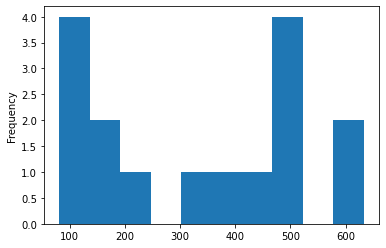

In [20]:
smile['num of upper natural teeth'].value_counts().plot.hist()

<AxesSubplot:ylabel='Frequency'>

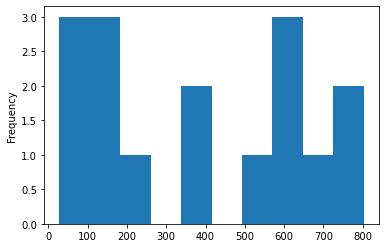

In [21]:
smile['num of lower natural teeth'].value_counts().plot.hist()

<AxesSubplot:xlabel='callernum', ylabel='Count'>

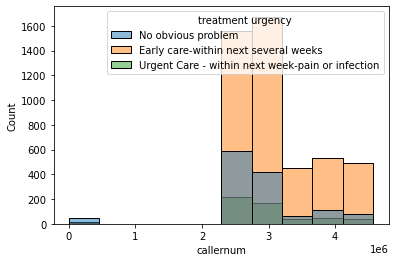

In [19]:
sns.histplot(data = smile, x='callernum', hue='treatment urgency', bins=10  )

### trying to utilize DP's code for dental issues

smile.loc[~smile['callernum'].isin([-1,-2])]['callernum'].nunique()

clients_list = smile.loc[~smile["callernum"].isin([-1,-2])]["callernum"].unique()
clients_list

n_clients_list = smile.loc[~smile["callernum"].isin([-1,-2])]["callernum"].nunique()
clients_list = smile.loc[~smile["callernum"].isin([-1,-2])]["callernum"].unique()

def make_callernum_dict(dataframe, colname):
    results = {}
    x=0
    while x in range (0,n_clients_list):
        patientdf = dataframe.loc[dataframe[colname]==clients_list[x]]
        results[clients_list[x]] = patientdf
        x += 1
    return results
    
callernum_dict = make_callernum_dict(smile,"callernum")

len(callernum_dict.keys())

callerNum_dict[4481785]["Base-line Oral and Conditions Questions - How would you describe the condition of your mouth and teeth?"].nunique()